In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle

def plot_graph(group, numbers, x_axis, save_file, metric, maximum):
    # Bar width for plotting
    bar_width = 0.15
    index = np.arange(len(x_axis))
    
    # Colors for the bars
    colors = ['navy', 'magenta', 'teal']  # Modify as needed

    # Set up the figure and axis
    fig, ax = plt.subplots()
    means_all, standard_errors_all = [], []

    for idx, type_name in enumerate(group[0]):
        # Extract values and compute means
        means = [np.mean(numbers[j][idx]) for j in range(len(x_axis))]
        means_all.extend(means)  # Collect all means for setting y-axis limits later
        # Compute standard errors
        standard_errors = [stats.sem(numbers[j][idx]) for j in range(len(x_axis))]
        standard_errors_all.extend(standard_errors)  # Collect all SEs for setting y-axis limits later

        # Plot bars with standard error bars
        ax.bar(index + idx * bar_width, means, bar_width, alpha=0.5, label=type_name, yerr=standard_errors, capsize=5, color=colors[idx], ecolor=colors[idx])

    # Some aesthetics for the plot
    ax.set_xlabel('models', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.set_xticks(index + bar_width * (len(group[0]) - 1) / 2)
    ax.set_xticklabels(x_axis, fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    # Set the y-axis limit to accommodate the means and standard errors
    minimum=-1*maximum
    ax.set_ylim([minimum, maximum])

    plt.tight_layout()
    plt.savefig(save_file, dpi=1200)
    plt.show()


## Opening the neccessary files

In [3]:

def opening_pickle_file(name):
    '''
    Opening specified file name
    '''
    print("Opening file", name)
    with open(name, 'rb') as file:
        data = pickle.load(file)
    return(data)

def get_file_XG(ttype,model,outcome):
    '''
    Opens the baseline score of comparison (XGBoost)
    '''
    d=opening_pickle_file(f"scores/{ttype}/{model}/{outcome}.pickle")
    return(d["auroc"],d["auprc"])

def get_file(ttype,model,outcome,outcome1):
    '''
    Does the following:
    1. Opens the specified file
    2. Computes the differences between the XGBoost classifier and the classifier of choice
    '''
    d=opening_pickle_file(f"scores/{ttype}/{model}/{outcome}.pickle")
    base_auroc,base_auprc=get_file_XG(ttype,model,outcome1)
    return([d["auroc"][i]-base_auroc[i] for i in range(len(base_auroc))],
           [d["auprc"][i]-base_auprc[i] for i in range(len(base_auprc))])




In [4]:
LR_bioClinicalBERT_MTL_death_in_30_auroc,LR_bioClinicalBERT_MTL_death_in_30_auprc=get_file("MTL","bioClinicalBERT","death_in_30_logreg","death_in_30")
LR_ClinicalBERT_MTL_death_in_30_auroc,LR_ClinicalBERT_MTL_death_in_30_auprc=get_file("MTL","clinicalBERT","death_in_30_logreg","death_in_30")
LR_bioGPT_MTL_death_in_30_auroc,LR_bioGPT_MTL_death_in_30_auprc=get_file("MTL","bioGPT","death_in_30_logreg","death_in_30")


Opening file scores/MTL/bioClinicalBERT/death_in_30_logreg.pickle
Opening file scores/MTL/bioClinicalBERT/death_in_30.pickle
Opening file scores/MTL/clinicalBERT/death_in_30_logreg.pickle
Opening file scores/MTL/clinicalBERT/death_in_30.pickle
Opening file scores/MTL/bioGPT/death_in_30_logreg.pickle
Opening file scores/MTL/bioGPT/death_in_30.pickle


In [5]:
RF_bioClinicalBERT_MTL_death_in_30_auroc,RF_bioClinicalBERT_MTL_death_in_30_auprc=get_file("MTL","bioClinicalBERT","death_in_30_rf","death_in_30")
RF_ClinicalBERT_MTL_death_in_30_auroc,RF_ClinicalBERT_MTL_death_in_30_auprc=get_file("MTL","clinicalBERT","death_in_30_rf","death_in_30")
RF_bioGPT_MTL_death_in_30_auroc,RF_bioGPT_MTL_death_in_30_auprc=get_file("MTL","bioGPT","death_in_30_rf","death_in_30")


Opening file scores/MTL/bioClinicalBERT/death_in_30_rf.pickle
Opening file scores/MTL/bioClinicalBERT/death_in_30.pickle
Opening file scores/MTL/clinicalBERT/death_in_30_rf.pickle
Opening file scores/MTL/clinicalBERT/death_in_30.pickle
Opening file scores/MTL/bioGPT/death_in_30_rf.pickle
Opening file scores/MTL/bioGPT/death_in_30.pickle


In [6]:
ffnn_bioClinicalBERT_MTL_death_in_30_auroc,ffnn_bioClinicalBERT_MTL_death_in_30_auprc=get_file("MTL","bioClinicalBERT","death_in_30_ffnn","death_in_30")
ffnn_ClinicalBERT_MTL_death_in_30_auroc,ffnn_ClinicalBERT_MTL_death_in_30_auprc=get_file("MTL","clinicalBERT","death_in_30_ffnn","death_in_30")
ffnn_bioGPT_MTL_death_in_30_auroc,ffnn_bioGPT_MTL_death_in_30_auprc=get_file("MTL","bioGPT","death_in_30_ffnn","death_in_30")


Opening file scores/MTL/bioClinicalBERT/death_in_30_ffnn.pickle
Opening file scores/MTL/bioClinicalBERT/death_in_30.pickle
Opening file scores/MTL/clinicalBERT/death_in_30_ffnn.pickle
Opening file scores/MTL/clinicalBERT/death_in_30.pickle
Opening file scores/MTL/bioGPT/death_in_30_ffnn.pickle
Opening file scores/MTL/bioGPT/death_in_30.pickle


## Plotting the graph

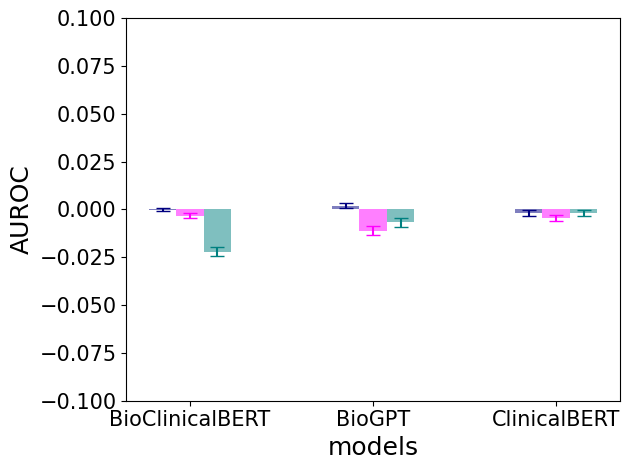

In [8]:
# define the x-axis and different groups to be plotted
x_axis=["BioClinicalBERT","BioGPT","ClinicalBERT"]
group=[["Logistic Regression","Random Forest","Fully-Connected NN"] for i in range(len(x_axis))]

# define the save_file
save_file="death_in_30_AUROC.jpg"
# define the metric (note this is also the y axis)
metric="AUROC"
# define the bars to be plotted (outer list is the model type -- bioClinicalBERT, bioGPT, and ClinicalBERT; inner list is the classifier type -- logistic Reg, RF, and FFNs)
numbers=[[LR_bioClinicalBERT_MTL_death_in_30_auroc,
          RF_bioClinicalBERT_MTL_death_in_30_auroc, ffnn_bioClinicalBERT_MTL_death_in_30_auroc],
         [ LR_bioGPT_MTL_death_in_30_auroc,
          RF_bioGPT_MTL_death_in_30_auroc, ffnn_bioGPT_MTL_death_in_30_auroc],
         [ ffnn_ClinicalBERT_MTL_death_in_30_auroc,
          RF_ClinicalBERT_MTL_death_in_30_auroc, ffnn_ClinicalBERT_MTL_death_in_30_auroc]]
         
plot_graph(group,numbers,x_axis, save_file, metric,0.1)